# Statistics Adv-5

Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
of 5 using Python. Interpret the results.

Ans. The Sample size is not given in question, let us assumne a sample size of 100, as population standard deviation is not given only sample standard deviationis given, so we use t statistics.

$n=100$, $\bar{x}=50$, $S=5$ confidence interval, $CI=95$, so we have $\alpha=1-0.95=0.05$

We can use the given formaula to find the confidence interval of population mean:
$$CI = \bar{x} \pm t_{\alpha/2}. \left(\frac{S}{\sqrt{n}}\right)$$

In [3]:
from math import sqrt
import scipy.stats as stats

sample_mean = 50
std = 5
n = 100
confidence = 95
alpha = 1 - confidence/100

t = stats.t.isf(alpha/2, n-1)
margin = (t*std)/sqrt(n)

CI = (sample_mean-margin, sample_mean+margin)
print(f"The {confidence}% confidence interval of population mean is {CI}")

The 95% confidence interval of population mean is (49.00789152424566, 50.99210847575434)


This means that there are 95% chances that the population mean lies between 49.008 and 50.992

Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
brown. Use Python to perform the test with a significance level of 0.05.

Ans. For a pack of 100, we have the number of candies of different colours as:

| Colour | Expected | Observed |
|---     | ---      | ----     |
|Blue    | 20       |24        |
|Orange  | 20       |20        |
|Green   | 20       |16        |
|Yellow  | 10       |14        |
|Red     | 10       |13        |
|Brown   | 20       |13        |

Chi square test can be performed using python as follows:

In [20]:
import scipy.stats as stat
import numpy as np

expected = [20, 20, 20, 10, 10, 20]
observed = [24, 20, 16, 14, 13, 13]

significance_level = 0.05
dof = len(observed)-1

chi_stat, p_value = stat.chisquare(observed, expected)

critical_value = stat.chi2.ppf(1-significance_level,dof)

print("RESULT:")
print(f'Chi-square statistic = {chi_stat:.4}')
print(f'Critical value = {critical_value:.4}')
if chi_stat > critical_value:
    print("We reject the Null Hypothesis. Distribution of colors of M&Ms in a bag doesn't match expected distribution")
else:
    print("We fail to reject the Null Hypothesis. Distribution of colors of M&Ms in bag matches expected distribution")

RESULT:
Chi-square statistic = 6.55
Critical value = 11.07
We fail to reject the Null Hypothesis. Distribution of colors of M&Ms in bag matches expected distribution


Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following

|          |Group A| Group B|
|---       |---    | ----   |
|Outcome 1 |20     | 15     |
|Outcome 2 |10     | 25     |
|Outcome 3 |15     | 20     |

Interpret the results of the test.

Ans. Firstly we calculate the expected values table as follows:

|          |Group A| Group B| Row total|
|---       |---    | ----   | -- |
|Outcome 1 |20     | 15     | 35|
|Outcome 2 |10     | 25     | 35|
|Outcome 3 |15     | 20     |35|
|column total| 45 | 60| Grand total = 105|

Thus expected values are

|          |Group A| Group B|
|---       |---    | ----   |
|Outcome 1 |15     | 20     |
|Outcome 2 |15     | 20     |
|Outcome 3 |15     | 20     |

- $H_0$: Null Hypothesis: There is no significant association between Group A and Group B.
- $H_1$: Alternative Hypothesis: There is a significant association between Group A and Group B.

Now, we conduct a chi-square test for independence using python:

In [7]:
import scipy.stats as stat
import numpy as np

expected = [15, 15, 15, 20, 20, 20]
observed = [20, 10, 15, 15, 25, 20]

chi_stat, p_value = stat.chisquare(observed,expected)

print("RESULT:")
print(f'Chi-square statistic = {chi_stat:.4}')
print(f'p_value = {p_value:.4}')

if chi_stat > critical_value:
    print("""We reject the Null Hypothesis. There is a significant association between Group A and Group B""")
else:
    print("""We fail to reject the Null Hypothesis. There is no significant association between Group A and Group B""")

RESULT:
Chi-square statistic = 5.833
p_value = 0.3228
We fail to reject the Null Hypothesis. There is no significant association between Group A and Group B


Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals
smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the
population who smoke.

Ans. For a proportion, the formula for confidence interval is as follows:
$$CI = p \pm Z_{\alpha/2}. \sqrt{\frac{p.(1-p)}{n}}$$

where:
- $p$ is the proportion
- $Z_{\alpha/2}$ is the z score
- $n$ is the sample size

Solution using pyhton is as shown:

In [28]:
from math import sqrt
import scipy.stats as stat

p = 60/500
n = 500
confidence = 95
alpha = 1 - confidence/100

z = abs(stat.norm.ppf(alpha/2))
margin = z*(sqrt(p*(1-p)/n))
CI = (p-margin, p+margin)

lower = CI[0]*500
upper = CI[1]*500

print(f"""The {confidence}% confidence interval  for the true proportion of individuals in population who smoke is 
{CI}. Thus the true proportion of individuals in population who smoke lies between {lower:.4} and {upper:.4}""")


The 95% confidence interval  for the true proportion of individuals in population who smoke is 
(0.09151638887130707, 0.1484836111286929). Thus the true proportion of individuals in population who smoke lies between 45.76 and 74.24


Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation
of 12 using Python. Interpret the results.

Ans. We have $\bar{x} = 75$, $s=12$, and $\alpha=1-0.90=0.10$. Size is not given. Let us assume, $n=100$

We can use t-distribution formaula to find the confidence interval of population mean:
$$CI = \bar{x} \pm t_{\alpha/2}. \left(\frac{s}{\sqrt{n}}\right)$$

where $t_{\alpha/2}. \left(\frac{s}{\sqrt{n}}\right)$ is the margin of error.

Solution using pyhton is as follows:

In [29]:
from scipy import stats
import math

sample_mean = 75
std = 12
n = 100
confidence = 90
alpha = 1-(confidence/100)

t = stats.t.isf(alpha/2, n-1)
margin = (t*std)/math.sqrt(n)
CI = (sample_mean-margin, sample_mean+margin)
print(f"The {confidence}% confidence interval of population mean is {CI}")

The 90% confidence interval of population mean is (73.00753061280433, 76.99246938719567)


Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the
area corresponding to a chi-square statistic of 15.

Ans. The plot is as shown:

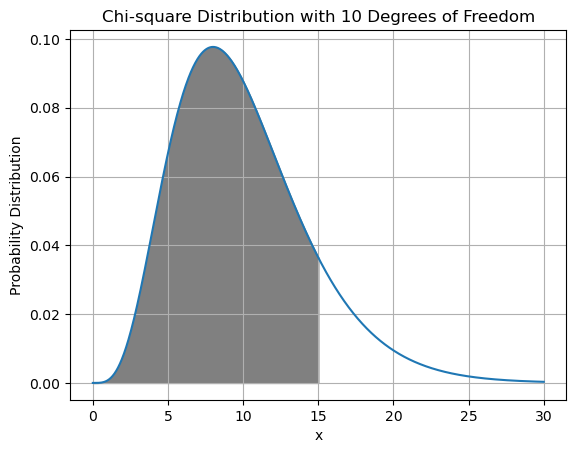

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat

dof = 10

x = np.linspace(0, 30, 1000)
y = stat.chi2.pdf(x, dof)

plt.plot(x,y)
plt.title("Chi-square Distribution with 10 Degrees of Freedom")
plt.xlabel("x")
plt.ylabel("Probability Distribution")

x_shaded = np.linspace(0, 15, 100)
y_shaded = stat.chi2.pdf(x_shaded, dof)
plt.fill_between(x_shaded, y_shaded, color='grey')

plt.grid()
plt.show()

Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520
preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who
prefer Coke.

Ans. For a proportion, the formula for confidence interval is as follows:
$$CI = p \pm Z_{\alpha/2}. \sqrt{\frac{p.(1-p)}{n}}$$

where:
- $p$ is the proportion
- $Z_{\alpha/2}$ is the z score
- $n$ is the sample size

Solution using pyhton is as shown:

In [13]:
from math import sqrt
import scipy.stats as stat

p = 520/1000
n = 1000
confidence = 99
alpha = 1 - confidence/100

z = abs(stat.norm.ppf(alpha/2))
margin = z*(sqrt(p*(1-p)/n))
CI = (p-margin, p+margin)

lower = CI[0]*1000
upper = CI[1]*1000

print(f"""The {confidence}% confidence interval  for true proportion of people who prefer coke is {CI}
Thus the true proportion of people in population who prefer coke lies between {lower:.5} and {upper:.5}""")

The 99% confidence interval  for true proportion of people who prefer coke is (0.4793051576779699, 0.5606948423220302)
Thus the true proportion of people in population who prefer coke lies between 479.31 and 560.69


Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe
45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the
expected frequencies of a fair coin. Use a significance level of 0.05.

Ans. The table is as follows:

|       | Expected | Observed |
| ---   | ----     | ----     |
| Heads | 50       | 55       | 
| Tails | 50       | 45       |

- $H_0$: Null Hypothesis. The coin is not biased
- $H_1$: Alternative Hypothesis. The coin is biased.

The Chi square test using python is as follows:

In [8]:
import scipy.stats as stat
import numpy as np

expected = [50,50]
observed = [55,45]

significance_level = 0.05
dof = len(observed)-1

chi_stat, p_value = stat.chisquare(observed, expected)

critical_value = stat.chi2.ppf(1-significance_level,dof)

print("RESULT:")
print(f'Chi-square statistic = {chi_stat:.4}')
print(f'Critical value = {critical_value:.4}')
if chi_stat > critical_value:
    print("We reject the Null Hypothesis. The coin is biased")
else:
    print("We fail to reject the Null Hypothesis. The coin is not biased")

RESULT:
Chi-square statistic = 1.0
Critical value = 3.841
We fail to reject the Null Hypothesis. The coin is not biased


Q9. A study was conducted to determine if there is an association between smoking status (smoker or
non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below.
Conduct a chi-square test for independence to determine if there is a significant association between
smoking status and lung cancer diagnosis.

|           | Lung Cancer: Yes | Lung Cancer: No |
|     ---   | ----             |  ------         |
| Smoker    | 60               |  140            |
| Non-smoker| 30               | 170             | 


Use a significance level of 0.05.

Ans. Firstly, we calculate row and column totals: 

|            | Lung Cancer: Yes | Lung Cancer: No | Row totals |
|     ---    | ----             |  ------         | ---        | 
| Smoker     | 60               |  140            | 200        |
| Non-smoker | 30               | 170             | 200        |
|Column total| 90               | 310             | Grand total = 400 |

Now expected values for every cell are found using formula:
$$ expected\_value = \frac{row\_total * column\_total}{grand\_total} $$
thus

|           | Lung Cancer: Yes | Lung Cancer: No |
|     ---   | ----             |  ------         |
| Smoker    | 45               | 155             |
| Non-smoker| 45               | 155             |

- $H_0$: Null Hypothesis: There is no significant association between smoking status and lung cancer diagnosis.
- $H_1$: Alternative Hypothesis: There is a significant association between smoking status and lung cancer diagnosis.

Chi square test is performed using python:

In [9]:
import scipy.stats as stat
import numpy as np

expected = [45, 45, 155, 155] 
observed = [60, 30, 140, 170]

significance_level = 0.05
dof = len(observed)-1

chi_stat, p_value = stat.chisquare(observed, expected)

critical_value = stat.chi2.ppf(1-significance_level,dof)

print("RESULT:")
print(f'Chi-square statistic = {chi_stat:.4}')
print(f'Critical value = {critical_value:.4}')
if chi_stat > critical_value:
    print("""We reject the Null Hypothesis. 
There is a significant association between smoking status and lung cancer diagnosis.""")
else:
    print("""We fail to reject the Null Hypothesis. 
There is a significant association between smoking status and lung cancer diagnosis.""")

RESULT:
Chi-square statistic = 12.9
Critical value = 7.815
We reject the Null Hypothesis. 
There is a significant association between smoking status and lung cancer diagnosis.


Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark
chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from
the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the
contingency table below. Conduct a chi-square test for independence to determine if there is a significant
association between chocolate preference and country of origin.

|           | Milk Chocolate | Dark Chocolate | White Chocolate |
|     ---   | ----             |  ------         | --|
| US        | 200               | 150             |150|
| UK        | 225               | 175             | 100|

Use a significance level of 0.01.

Ans. The expected table is derived as follows:

|           | Milk Chocolate | Dark Chocolate    | White Chocolate | Row total|
|     ---   | ----             |  ------         | --    | -- |
| US        | 200               | 150             |150   | 500 |
| UK        | 225               | 175             | 100  | 500 |
|Column total | 425 | 325 | 250 | Grand total = 1000 |

Expected table:

|           | Milk Chocolate | Dark Chocolate | White Chocolate |
|     ---   | ----             |  ------         | --|
| US        | 212.5               | 162.5             |125|
| UK        | 212.5               | 162.5             | 125|

- $H_0$: Null Hypothesis: There is no significant association between chocolate preference and country of origin.
- $H_1$: Alternative Hypothesis: There is a significant association between chocolate preference and country of origin

In [6]:
import scipy.stats as stat
import numpy as np

expected = [200, 225, 150, 175, 150, 100]
observed = [212.5, 212.5, 162.5, 162.5, 125, 125]

significance_level = 0.05
dof = len(observed)-1

chi_stat, p_value = stat.chisquare(observed, expected)

critical_value = stat.chi2.ppf(1-significance_level,dof)

print("RESULT:")
print(f'Chi-square statistic = {chi_stat:.4}')
print(f'Critical value = {critical_value:.4}')

if chi_stat > critical_value:
    print("""We reject the Null Hypothesis. 
There is a significant association between chocolate preference and country of origin.""")
else:
    print("""We fail to reject the Null Hypothesis. 
There is no significant association between chocolate preference and country of origin.""")

RESULT:
Chi-square statistic = 13.83
Critical value = 11.07
We reject the Null Hypothesis. 
There is a significant association between chocolate preference and country of origin.


Q11. A random sample of 30 people was selected from a population with an unknown mean and standard
deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10.
Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a
significance level of 0.05.

Ans. We have $\mu=70, $$\bar{x}=72$, $n=30$, $S=10$, $\alpha=0.05$. The null and alternative hypothesis are:

- $H_0$: Null Hypothesis: the population mean is not significantly different from 70.
- $H_1$: Alternative Hypothesis: the population mean is significantly different from 70

Using the formula,
$$ t = \frac{\bar{x} - \mu }{\frac{S}{\sqrt{n}}} $$

Solution using python is as follows:

In [4]:
import scipy.stats as sta
from math import sqrt

n = 30
sample_mean = 72
sample_std = 10
mean = 70
significance_level = 0.05
dof = n - 1 

t = (sample_mean-mean)/(sample_std/sqrt(n))
p = stat.t.ppf(1-significance_level/2, dof)

print("RESULT:")

if t<-p or t>p:
    print("We reject the Null Hypothesis. The population mean is significantly different from 70")
else:
    print("We accept the Null Hypothesis. The population mean is not significantly different from 70")


RESULT:
We accept the Null Hypothesis. The population mean is not significantly different from 70
